# CHAT-BOT ANALYSIS

In [1]:
# import libraries here
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Leemos el csv
chatbot=pd.read_csv('chatbot1.csv',header=0,encoding = 'unicode_escape')
chatbot.head()

,PREGUNTAS FRECUENTES
0,quien eres?
1,me gustaria saber informacion sobre becas que ...
2,que tipo de cursos se imparten en ironhack?
3,como son los prcesos de admision?
4,tengo que saber a programar para estudiar en i...


In [3]:
# Conocemos la estructura del dataset
chatbot.shape

(66, 1)

In [4]:
# Limpiamos tokenizando y agregando en una columna nueva los datos limpios
from nltk import sent_tokenize, word_tokenize

In [5]:
frases = sent_tokenize(chatbot['PREGUNTAS FRECUENTES'][0])
frases

['quien eres?']

In [6]:
chatbot['PALABRAS']=chatbot['PREGUNTAS FRECUENTES'].apply(word_tokenize)

In [7]:
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS
0,quien eres?,"[quien, eres, ?]"
1,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca..."
2,que tipo de cursos se imparten en ironhack?,"[que, tipo, de, cursos, se, imparten, en, iron..."
3,como son los prcesos de admision?,"[como, son, los, prcesos, de, admision, ?]"
4,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi..."


In [8]:
def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        s: The string to be cleaned up.

    Returns:
        A string that has been cleaned up.
    """
    import re
    s = re.sub("http://ironhack.com", ' ', s)
    s = re.sub('\d+', ' ', s)
    s = re.sub('\W+', ' ', s)
    s = s.lower().strip()
    return s

In [9]:
chatbot['PALABRAS']=chatbot['PREGUNTAS FRECUENTES'].apply(clean_up)

In [10]:
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS
0,quien eres?,quien eres
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack
3,como son los prcesos de admision?,como son los prcesos de admision
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...


In [11]:
def tokenize(s):
    """
    Tokenize a string.

    Args:
        s: String to be tokenized.

    Returns:
        A list of words as the result of tokenization.
    """
    from nltk import word_tokenize
    s = word_tokenize(s)
    return s

In [12]:
chatbot['PALABRAS2']=chatbot['PALABRAS'].apply(tokenize)

In [13]:
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2
0,quien eres?,quien eres,"[quien, eres]"
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca..."
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron..."
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]"
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi..."


In [14]:
bag_of_words = list(chatbot['PALABRAS2'])



In [15]:
print(len(bag_of_words))

66



#eliminar preposiciones
stop_words = ['a', 'con', 'de', 'desde', 'en', 'entre', 'hasta', 'para', 'por', 'sin', 'sobre', 'tras', 'via', 'me', 'mi', 'te', 'el', 'la']


for word in bag_of_words:
    if word in stop_words:
        bag_of_words.remove(word)
        
print(bag_of_words)

In [16]:
# Contamos el número de palabras del PREGUNTAS FRECUENTES.
chatbot['word_count'] = chatbot['PALABRAS2'].apply(len)
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2,word_count
0,quien eres?,quien eres,"[quien, eres]",2
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca...",9
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron...",8
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]",6
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi...",9


In [17]:
# Contamos también el número total de letras .
chatbot['char_len'] = chatbot['PALABRAS2'].apply(lambda comment: sum(len(word) for word in comment))
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2,word_count,char_len
0,quien eres?,quien eres,"[quien, eres]",2,9
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca...",9,58
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron...",8,35
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]",6,27
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi...",9,45


In [18]:
# Sacamos el número de stops words que hay en PREGUNTAS FRECUENTES marcando el idioma español.
stop = stopwords.words('spanish')
chatbot['stopwords'] = chatbot['PALABRAS2'].apply(lambda comment: len([word for word in comment if word in stop]))
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2,word_count,char_len,stopwords
0,quien eres?,quien eres,"[quien, eres]",2,9,2
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca...",9,58,3
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron...",8,35,4
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]",6,27,4
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi...",9,45,5


In [19]:
###### AQUI HACER EL STOP WORDS ######

In [20]:
# Buscamos las palabras más frecuentes.
freq = pd.Series(' '.join(" ".join(comment) for comment in chatbot['PALABRAS2']).split(" ")).value_counts()[:10]
freq

de          31
en          20
que         18
el          16
bootcamp    11
hay         11
ironhack    10
es           9
se           9
la           8
dtype: int64

In [21]:
# Buscamos las palabras menos frecuentes.
less_freq = pd.Series(' '.join(" ".join(comment) for comment in chatbot['PALABRAS2']).split(" ")).value_counts()[-10:]
less_freq

camiseta       1
comerdor       1
comedoren      1
cursar         1
programador    1
vienen         1
consiste       1
tal            1
ironhacker     1
escuela        1
dtype: int64

In [22]:
# Eliminamos las palabras menos frecuentes.
less_freq_list = list(less_freq.index)
chatbot['PALABRAS2'] = chatbot['PALABRAS2'].apply(lambda comment: [word for word in comment if word not in less_freq_list])
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2,word_count,char_len,stopwords
0,quien eres?,quien eres,"[quien, eres]",2,9,2
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca...",9,58,3
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron...",8,35,4
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]",6,27,4
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi...",9,45,5


In [23]:
#Descargamos el CSV con nuestro Data Frame.
#chatbot.to_csv('chatbot_analysis.csv')

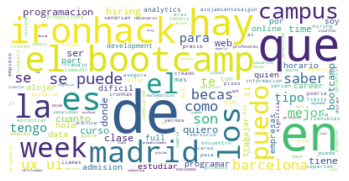

In [24]:
# Creamos y descargamos una nube de palabras para poder analizar cuáles son las palabras más utilizadas.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=70, background_color="White").generate(" ".join(" ".join(comment) for comment in chatbot['PALABRAS2']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


plt.savefig('nube.png')
plt.show()

In [25]:
# Creamos una lista con las palabras clave que queremos analizar
keywords=['data','web','UX']

def key_words(x):
    new_list=[]
    for word in x:
        if word in keywords:
            new_list.append(word)
    return new_list

In [26]:
# Extraemos en una columna nueva las palabras clave
chatbot['KEY_WORDS']=chatbot['PALABRAS2'].apply(key_words)

In [27]:
for sentence in [(sentence) for sentence in chatbot]:
    for word in sentence:
        if word not in bag_of_words:
            bag_of_words.append(word)

In [47]:
chatbot

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2,word_count,char_len,stopwords,KEY_WORDS,key_count
0,quien eres?,quien eres,"[quien, eres]",2,9,2,[],0
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca...",9,58,3,[],0
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron...",8,35,4,[],0
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]",6,27,4,[],0
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi...",9,45,5,[],0
5,que precio tienen los bootcamps?,que precio tienen los bootcamps,"[que, precio, tienen, los, bootcamps]",5,27,3,[],0
6,quien te ha creado?,quien te ha creado,"[quien, te, ha, creado]",4,15,3,[],0
7,por que ironhack es la mejor escuela de progra...,por que ironhack es la mejor escuela de progra...,"[por, que, ironhack, es, la, mejor, de, progra...",9,44,5,[],0
8,teneis alojamientos?,teneis alojamientos,"[teneis, alojamientos]",2,18,0,[],0
9,donde me puedo alojar en madrid?,donde me puedo alojar en madrid,"[donde, me, puedo, alojar, en, madrid]",6,26,3,[],0


In [29]:
bag_of_words

[['quien', 'eres'],
 ['me',
  'gustaria',
  'saber',
  'informacion',
  'sobre',
  'becas',
  'que',
  'proporciona',
  'ironhack'],
 ['que', 'tipo', 'de', 'cursos', 'se', 'imparten', 'en', 'ironhack'],
 ['como', 'son', 'los', 'prcesos', 'de', 'admision'],
 ['tengo',
  'que',
  'saber',
  'a',
  'programar',
  'para',
  'estudiar',
  'en',
  'ironhack'],
 ['que', 'precio', 'tienen', 'los', 'bootcamps'],
 ['quien', 'te', 'ha', 'creado'],
 ['por',
  'que',
  'ironhack',
  'es',
  'la',
  'mejor',
  'escuela',
  'de',
  'programacion'],
 ['teneis', 'alojamientos'],
 ['donde', 'me', 'puedo', 'alojar', 'en', 'madrid'],
 ['quiero', 'trabajar', 'en', 'ironhak'],
 ['hay', 'becas'],
 ['cuantos', 'campus', 'de', 'ironhack', 'hay', 'en', 'total'],
 ['cuanto', 'duran', 'los', 'bootcamps', 'de', 'part', 'time'],
 ['si',
  'empiezo',
  'un',
  'curso',
  'en',
  'full',
  'time',
  'y',
  'encuentro',
  'trabajo',
  'al',
  'mes',
  'podria',
  'cambiarme',
  'a',
  'part',
  'time'],
 ['que',
  'ti

In [30]:
print(len(bag_of_words))

101


In [31]:
# Aislamos la lista clave para su análisis
key_lista = list(chatbot['KEY_WORDS'])

In [32]:
key_words_list = []

for x in key_lista:
    for y in x:
        key_words_list.append(y)

print(key_words_list)

['web', 'data', 'web', 'web', 'data']


In [33]:
# Contamos el número de palabras de KEY_WORDS.
chatbot['key_count'] = chatbot['KEY_WORDS'].apply(len)
chatbot.head()

,PREGUNTAS FRECUENTES,PALABRAS,PALABRAS2,word_count,char_len,stopwords,KEY_WORDS,key_count
0,quien eres?,quien eres,"[quien, eres]",2,9,2,[],0
1,me gustaria saber informacion sobre becas que ...,me gustaria saber informacion sobre becas que ...,"[me, gustaria, saber, informacion, sobre, beca...",9,58,3,[],0
2,que tipo de cursos se imparten en ironhack?,que tipo de cursos se imparten en ironhack,"[que, tipo, de, cursos, se, imparten, en, iron...",8,35,4,[],0
3,como son los prcesos de admision?,como son los prcesos de admision,"[como, son, los, prcesos, de, admision]",6,27,4,[],0
4,tengo que saber a programar para estudiar en i...,tengo que saber a programar para estudiar en i...,"[tengo, que, saber, a, programar, para, estudi...",9,45,5,[],0


In [45]:
# Resultado de qué bootcamp se pregunta más 
chatbot['KEY_WORDS'].value_counts()

[]        61
[web]      3
[data]     2
Name: KEY_WORDS, dtype: int64

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
txt = "Ironhack is a Global Tech School ranked num 2 worldwide.   Our mission is to help people transform their careers and join a thriving community of tech professionals that love what they do."
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(txt)

NameError: name 'nltk' is not defined

In [20]:
bag_of_words = ('ironhack', 'becas', 'bootcamp', 'data analytics', 'web development', 'UX/UI', 'alojamientos', 'trabajo', 'programacion', 'trabajar', 'campus', 'online', 'trabajar', 'madrid', 'barcelona', 'comedor', 'tuppers', 'horario', 'hiring week', 'career week')



In [ ]:
stop_words = ['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neither', 'seemed', 'ever', 'across', 'she', 'somehow', 'be', 'we', 'full', 'never', 'sixty', 'however', 'here', 'otherwise', 'were', 'whereupon', 'nowhere', 'although', 'found', 'alone', 're', 'along', 'fifteen', 'by', 'both', 'about', 'last', 'would', 'anything', 'via', 'many', 'could', 'thence', 'put', 'against', 'keep', 'etc', 'amount', 'became', 'ltd', 'hence', 'onto', 'or', 'con', 'among', 'already', 'co', 'afterwards', 'formerly', 'within', 'seems', 'into', 'others', 'while', 'whatever', 'except', 'down', 'hers', 'everyone', 'done', 'least', 'another', 'whoever', 'moreover', 'couldnt', 'throughout', 'anyhow', 'yourself', 'three', 'from', 'her', 'few', 'together', 'top', 'there', 'due', 'been', 'next', 'anyone', 'eleven', 'much', 'call', 'therefore', 'interest', 'then', 'thru', 'themselves', 'hundred', 'was', 'sincere', 'empty', 'more', 'himself', 'elsewhere', 'mostly', 'on', 'fire', 'am', 'becoming', 'hereby', 'amongst', 'else', 'part', 'everywhere', 'too', 'herself', 'former', 'those', 'he', 'me', 'myself', 'made', 'twenty', 'these', 'bill', 'cant', 'us', 'until', 'besides', 'nevertheless', 'below', 'anywhere', 'nine', 'can', 'of', 'your', 'toward', 'my', 'something', 'and', 'whereafter', 'whenever', 'give', 'almost', 'wherever', 'is', 'describe', 'beforehand', 'herein', 'an', 'as', 'itself', 'at', 'have', 'in', 'seem', 'whence', 'ie', 'any', 'fill', 'again', 'hasnt', 'inc', 'thereby', 'thin', 'no', 'perhaps', 'latter', 'meanwhile', 'when', 'detail', 'same', 'wherein', 'beside', 'also', 'that', 'other', 'take', 'which', 'becomes', 'you', 'if', 'nobody', 'see', 'though', 'may', 'after', 'upon', 'most', 'hereupon', 'eight', 'but', 'serious', 'nothing', 'such', 'why', 'a', 'off', 'whereby', 'third', 'i', 'whole', 'noone', 'sometimes', 'well', 'amoungst', 'yours', 'their', 'rather', 'without', 'so', 'five', 'the', 'first', 'whereas', 'once']

# Write your code below

for word in bag_of_words:
    if word in stop_words:
        bag_of_words.remove(word)
        
print(bag_of_words)

# TEXT MINING

In [46]:
chatbot_usuarios=pd.read_csv('chatbot_usuarios.csv', sep=';', header=0,encoding = 'unicode_escape')
chatbot_usuarios.head()

,PREGUNTAS FRECUENTES,USUARIOS,FECHA,EDAD
0,quien eres?,usuario 1,15/10/19,18.0
1,me gustaria saber informacion sobre becas que ...,usuario 2,15/10/19,22.0
2,que tipo de cursos se imparten en ironhack?,usuario 3,15/10/19,22.0
3,como son los prcesos de admision?,usuario 4,16/10/19,23.0
4,tengo que saber a programar para estudiar en i...,usuario 5,16/10/19,23.0


In [36]:
# Listamos el todas las columnas
for col in chatbot_usuarios.columns:
    print(col)

PREGUNTAS FRECUENTES
USUARIOS
FECHA
EDAD


In [53]:
# Analizamos
chatbot_usuarios.shape

(66, 4)

In [45]:
# Aquí saco la media de la edad de los usuarios que quieren saber cosas sobre IRONHACK

edad_ave = chatbot_usuarios['EDAD']
edad_ave.head()

0    18.0
1    22.0
2    22.0
3    23.0
4    23.0
Name: EDAD, dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'values'

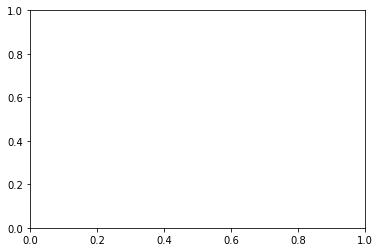

In [43]:
f, ax = plt.subplots()

x = ['data', 'web', 'ux']
y = edad_ave.values

ax.bar(l,y)
ax.set_xticks(l)
ax.set_xticklabels(x, rotation='vertical')

plt.show()

In [48]:
grouped_fecha = chatbot_usuarios.groupby('FECHA')
mean_by_usuario = grouped_fecha.mean()
mean_by_usuario

,EDAD
FECHA,
15/10/19,20.666667
16/10/19,24.000000
17/10/19,27.000000
18/10/19,27.000000
19/10/19,29.000000
20/10/19,22.500000
21/10/19,35.000000
22/10/19,22.000000
23/10/19,NaN


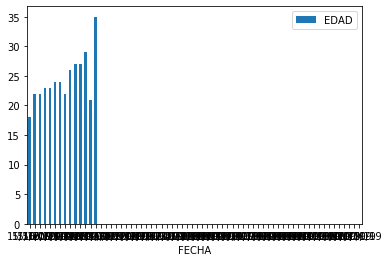

In [51]:

ax = chatbot_usuarios.plot.bar(x='FECHA', y='EDAD', rot=0)

In [49]:
#Primero imprimo por separado para comprobar que van funcionando

plot1 = chatbot_usuarios.plot('EDAD', 'USUARIOS', kind="scatter", figsize = (4,8), alpha = 0.8)
plt.show()

ValueError: scatter requires y column to be numeric

In [62]:
freq.mean()

14.3